In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("~/Downloads/bioresponse.csv")
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [4]:
df.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Metrics functions

In [5]:
def confusion_matrix_params(y_test, y_predicted):
    Tp = np.sum((y_predicted == 1) & (y_test == 1))
    Tn = np.sum((y_predicted == 0) & (y_test == 0))
    Fp = np.sum((y_predicted == 1) & (y_test == 0))
    Fn = np.sum((y_predicted == 0) & (y_test == 1))
    return Tp, Tn, Fp, Fn

In [6]:
def accuracy(y_test : np.ndarray, y_predicted : np.ndarray) -> float:
    Tp, Tn, Fp, Fn = confusion_matrix_params(y_test, y_predicted)
    if Tp + Tn + Fp + Fn == 0:
        return 0.0
    accuracy = (Tp + Tn) / (Tp + Tn + Fp + Fn)
    
    return accuracy

In [7]:
def precision(y_test : np.ndarray, y_predicted : np.ndarray) -> float:
    Tp, _, Fp, _ = confusion_matrix_params(y_test, y_predicted)
    if Tp + Fp == 0:
        return 0.
    precision = Tp / (Tp + Fp)
    return precision

In [8]:
def recall(y_test, y_predicted): 
    Tp, _, _, Fn = confusion_matrix_params(y_test, y_predicted)
    if Tp + Fn == 0:
        return 0.
    recall = Tp / (Tp + Fn)
    return recall

In [9]:
 def f1_score(y_test, y_predicted):
    p = precision(y_test, y_predicted)
    r = recall(y_test, y_predicted)
    f1_score = 2 * (p * r) / (p + r)
    return f1_score

In [10]:
def log_loss(y_test, y_predicted_prob):
    eps = 1e-3
    y_predicted_prob[y_predicted_prob == 0] += eps
    y_predicted_prob[y_predicted_prob == 1] -= eps
    return -np.sum(y_test * np.log(y_predicted_prob) + (1-y_test) * np.log( 1 - y_predicted_prob)) / len(y_test)
    

In [11]:
def print_metrics(y_test, y_predicted):
    acc = accuracy(y_test, y_predicted)
    prec = precision(y_test, y_predicted)
    rec = recall(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    print(f"Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}\nF1 score: {f1}")

### ROC curve

In [12]:
def ROC_curve(y_true, probs): 
    thresholds = np.unique(probs)[::-1]
    
    tpr = [0]
    fpr = [0]
    
    for threshold in thresholds:
        y_pred = (probs >= threshold).astype(int) 
        Tp, Tn, Fp, Fn = confusion_matrix_params(y_true, y_pred)
        FPR = Fp / (Fp + Tn) if (Fp + Tn) != 0 else 0  
        fpr.append(FPR)
        TPR = Tp / (Tp + Fn) if (Tp + Fn) != 0 else 0  
        tpr.append(TPR)
    plt.plot(fpr, tpr)
    plt.grid()
    plt.show()
        

## PR curve

In [13]:
def PR_curve(y_true, probs): 
    thresholds = np.append(np.array([1]), np.unique(probs)[::-1])
    thresholds = np.append(thresholds, 0)
    p = []
    r = []
    
    for threshold in thresholds:
        y_pred = (probs > threshold).astype(int)
        Tp = np.sum((y_pred == 1) & (y_test == 1))
        Tn = np.sum((y_pred == 0) & (y_test == 0))
        Fp = np.sum((y_pred == 1) & (y_test == 0))
        Fn = np.sum((y_pred == 0) & (y_test == 1))
        prec = precision(y_test, y_pred) if Tp + Fp != 0 else 1
        p.append(prec)
        rec = recall(y_test, y_pred) if Tp + Fn != 0 else 0
        r.append(rec)
    plt.plot(thresholds, r, color='red')
    plt.plot(thresholds, p, color='blue')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.show()
        

# Splitting dataset

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Activity'])
y = df['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training our models

## Small decision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 8, min_samples_split=10, min_samples_leaf=4, random_state=42)

In [16]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [17]:
y_predicted_dtc = dtc.predict(X_test)
y_pred_proba_dtc = dtc.predict_proba(X_test)[:, 1]


In [18]:
print_metrics(y_test, y_predicted_dtc)
print(f"Log-loss score: {log_loss(y_test, y_pred_proba_dtc)}")

Accuracy: 0.7536617842876165
Precision: 0.7780269058295964
Recall: 0.8013856812933026
F1 score: 0.7895335608646189
Log-loss score: 0.8557821493043642


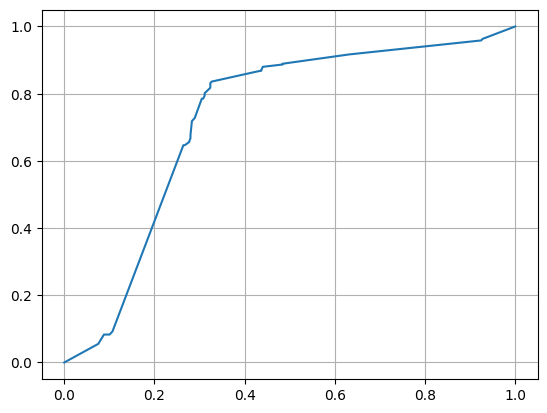

In [19]:

ROC_curve(y_test, y_pred_proba_dtc)


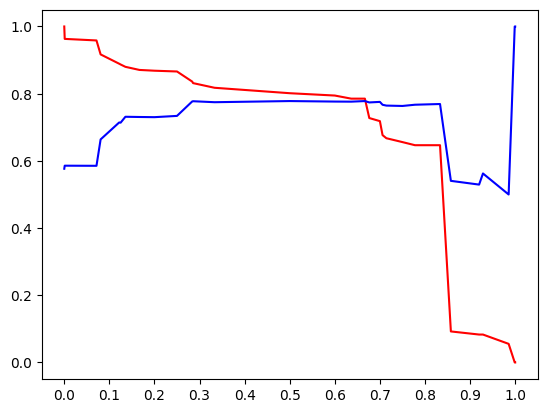

In [20]:
PR_curve(y_test, y_pred_proba_dtc)

## Deep decision tree

In [21]:
deep_dtc = DecisionTreeClassifier(max_depth=35, min_samples_split = 5, min_samples_leaf=10, random_state=42)
deep_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=35, min_samples_leaf=10, min_samples_split=5,
                       random_state=42)

In [22]:
y_pred_deep_tree = deep_dtc.predict(X_test)
y_prob_tree = deep_dtc.predict_proba(X_test)[:, 1]


In [23]:
print_metrics(y_test, y_pred_deep_tree)
print(f"Log-loss score: {log_loss(y_test, y_prob_tree)}")

Accuracy: 0.7097203728362184
Precision: 0.7602905569007264
Recall: 0.7251732101616628
F1 score: 0.7423167848699763
Log-loss score: 0.9304961121755363


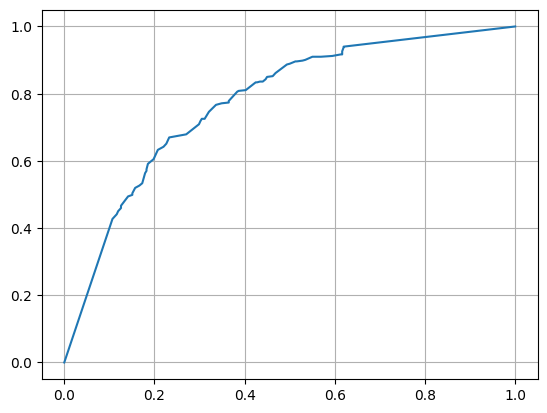

In [24]:
ROC_curve(y_test, y_prob_tree)

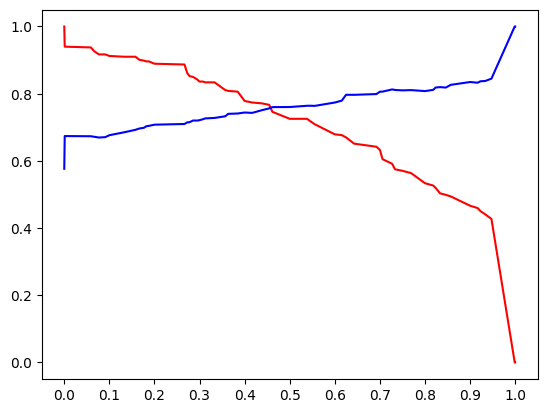

In [25]:
PR_curve(y_test, y_prob_tree)

## Random forest with small trees

In [26]:
from sklearn.ensemble import RandomForestClassifier
small_forest = RandomForestClassifier(max_depth=8, min_samples_split = 10, min_samples_leaf=4, random_state=42)
small_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [27]:
y_pred_forest = small_forest.predict(X_test)
y_forest_prob = small_forest.predict_proba(X_test)[:, 1]

In [28]:
print_metrics(y_test, y_pred_forest)
print(f"Log-loss score: {log_loss(y_test, y_forest_prob)}")

Accuracy: 0.7882822902796272
Precision: 0.8277511961722488
Recall: 0.7990762124711316
F1 score: 0.8131609870740304
Log-loss score: 0.5055211297605106


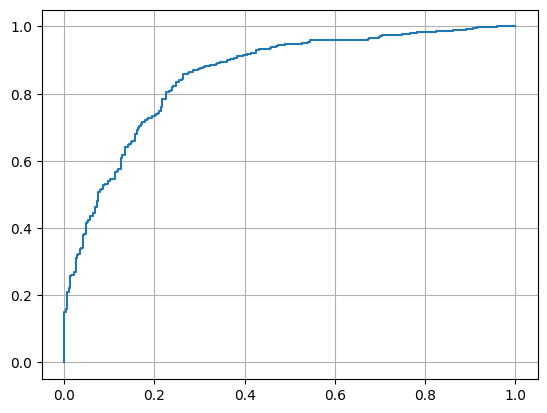

In [29]:
ROC_curve(y_test, y_forest_prob)

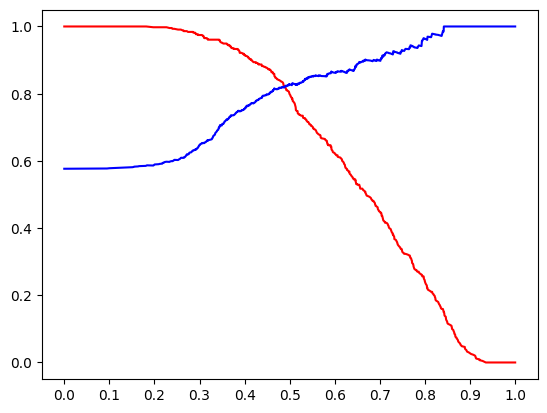

In [30]:
PR_curve(y_test, y_forest_prob)

## Random forest with deep trees

In [31]:
deep_tree_forest = RandomForestClassifier(max_depth = 30, min_samples_leaf=3, min_samples_split=2, random_state=42)
deep_tree_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=3, random_state=42)

In [32]:
y_pred_deep_forest = deep_tree_forest.predict(X_test)
y_deep_for_proba = deep_tree_forest.predict_proba(X_test)[:, 1]

In [33]:
print_metrics(y_test, y_pred_deep_forest)
print(f"Log-loss score: {log_loss(y_test, y_deep_for_proba)}")

Accuracy: 0.800266311584554
Precision: 0.8329411764705882
Recall: 0.8175519630484989
F1 score: 0.8251748251748252
Log-loss score: 0.4614574718047354


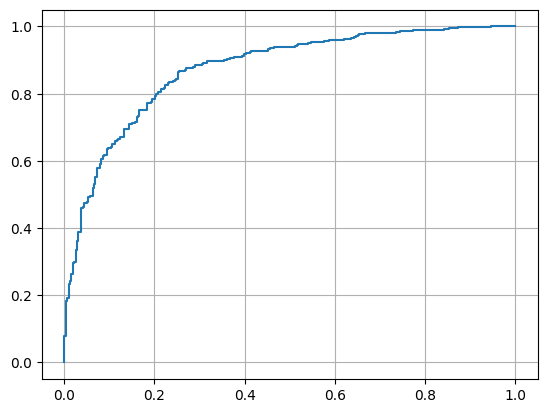

In [34]:
ROC_curve(y_test, y_deep_for_proba)

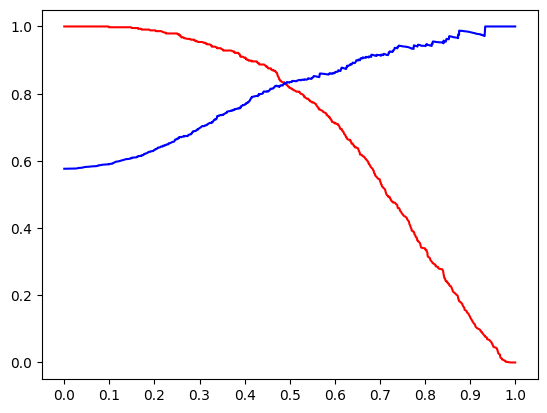

In [35]:
PR_curve(y_test, y_deep_for_proba)

## Avoiding Fn

In [36]:
model = RandomForestClassifier(max_depth = 20, min_samples_leaf=3, min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=3, random_state=42)

In [40]:
Threshold = 0.3
prb = model.predict_proba(X_test)[:, 1]
pred = (prb >= Threshold).astype(int)
print_metrics(y_test, pred)
print(f"Log loss: {log_loss(y_test, prb)}")

Accuracy: 0.7323568575233023
Precision: 0.6939799331103679
Recall: 0.9584295612009238
F1 score: 0.8050436469447139
Log loss: 0.46285532578565647
